# Communciation

## OSI (Open Systems Interconnection) 7 Layer Model

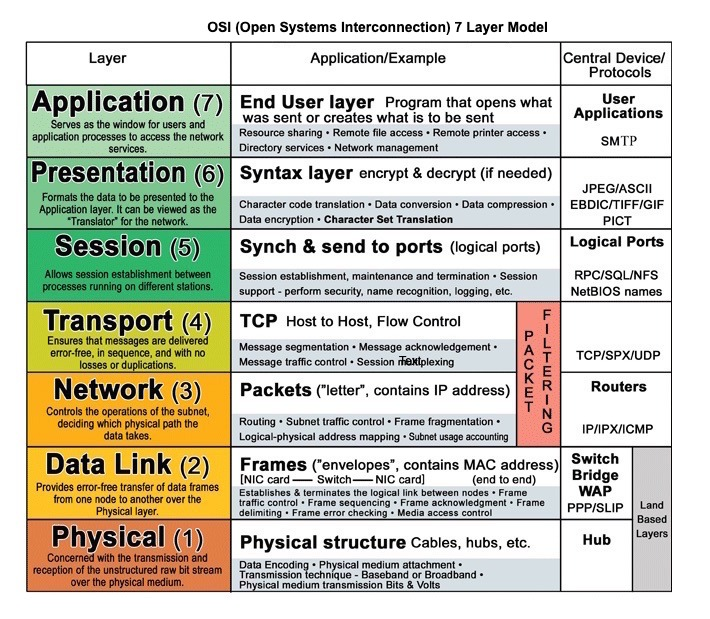

## HTTP

- Method for encoding and transporting data between a client and server
- It is a request/response protocol; a client issues a request, and server issues a response with content and completion status
- A basic HTTP request contains a verb (method) and a resource (endpoint)
    - GET: Read a resource
    - POST: Create a resource
    - PUT: Create/Replace a resource
    - PATCH: Partially update a resource
    - DELETE: Delete a resource

## TCP

- TCP is a connection type for an IP network 
- A connection is established and terminated using a handshake. 
- It comes with guarantee that all packets sent are guaranteed to reach the destination in the original order and without corruption
- BUT because of this, connection can be slow
- Use TCP when you need reliability, not speed (e.g. file uploads cannot be incomplete, else you have corrupted files)

## UDP

- UDP is connectionless. 
- Datagrams (i.e. packets) might reach their destination out of order or not at all. 
    - No guarantees that all datagrams will reach destination in order, and without corruption
    - BUT fast!

- UDP can broadcast, which sends datagrams to all devices on the subnet. 
    - Useful for cases like DHCP because the client has not yet received an IP address

- Useful for things like VoIP, video chat, online games, etc where a few dropped packets are fine 

- Use UDP over TCP when:
    - Latency sensitive
    - Data loss is ok 
    - Late data is not ok
    - You want to implement your own error correction

## Remote Procedure Call (RPC)

- Instead of a client sending a request (i.e. in HTTP), client invokes a procedure on a different address (hence remote procedure call) 
- Procedure is coded as if it were a local procedure call, and abstracts away the details of how to communicate with the server from the client program. 
- RPCs are usually slower and less reliable than local calls,
- Popular RPC frameworks include Protobuf, Thrift, and Avro

- RPC is a request-response protocol:
    - Client program: Calls the client stub procedure. The parameters are pushed onto the stack like a local procedure call.
    - Client stub procedure: Marshals (packs) procedure id and arguments into a request message.
    - Client communication module: OS sends the message from the client to the server.
    - Server communication module: OS passes the incoming packets to the server stub procedure.
    - Server stub procedure: Unmarshalls the results, calls the server procedure matching the procedure id and passes the given arguments.
    - The server response repeats the steps above in reverse order.

- Generally, use RPC for internal communications, for performance reasons

- Disadvantages
    - RPC clients become tightly coupled to the service implementation.
    - A new API must be defined for every new operation or use case.
    - It can be difficult to debug RPC.
    - You might not be able to leverage existing technologies out of the box. For example, it might require additional effort to ensure RPC calls are properly cached on caching servers such as Squid.

## Representational state transfer (REST)

- REST is an architectural style enforcing a client/server model where the client acts on a set of resources managed by the server. 
- The server provides a representation of resources and actions that can either manipulate or get a new representation of resources. 
- All communication must be **stateless** and **cacheable**.

- There are four qualities of a RESTful interface:
    - Identify resources (URI in HTTP) - use the same URI regardless of any operation.
    - Change with representations (Verbs in HTTP) - use verbs, headers, and body.
    - Self-descriptive error message (status response in HTTP) - Use status codes, don't reinvent the wheel.
    - HATEOAS (HTML interface for HTTP) - your web service should be fully accessible in a browser.

- REST focuses on exposing data, RPC focuses on doing stuff
    - Being stateless, it scales much more easily

- Disadvantages
    - Due to focus on exposing data, REST might not be a good fit if resources are not naturally organized or accessed in a simple hierarchy. 
        - e.g. returning all updated records from the past hour matching a particular set of events isn't really easily expressed as a URL path. 
    - REST relies on a few verbs (GET, POST, PUT, DELETE, and PATCH) which sometimes doesn't fit your use case. 
    - Fetching complicated resources may require multiple round trips between the client and server
    - Over time, more fields might be added to an API response and older clients will receive all new data fields, even those that they do not need